<ipython-input-1-3108c5202673>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


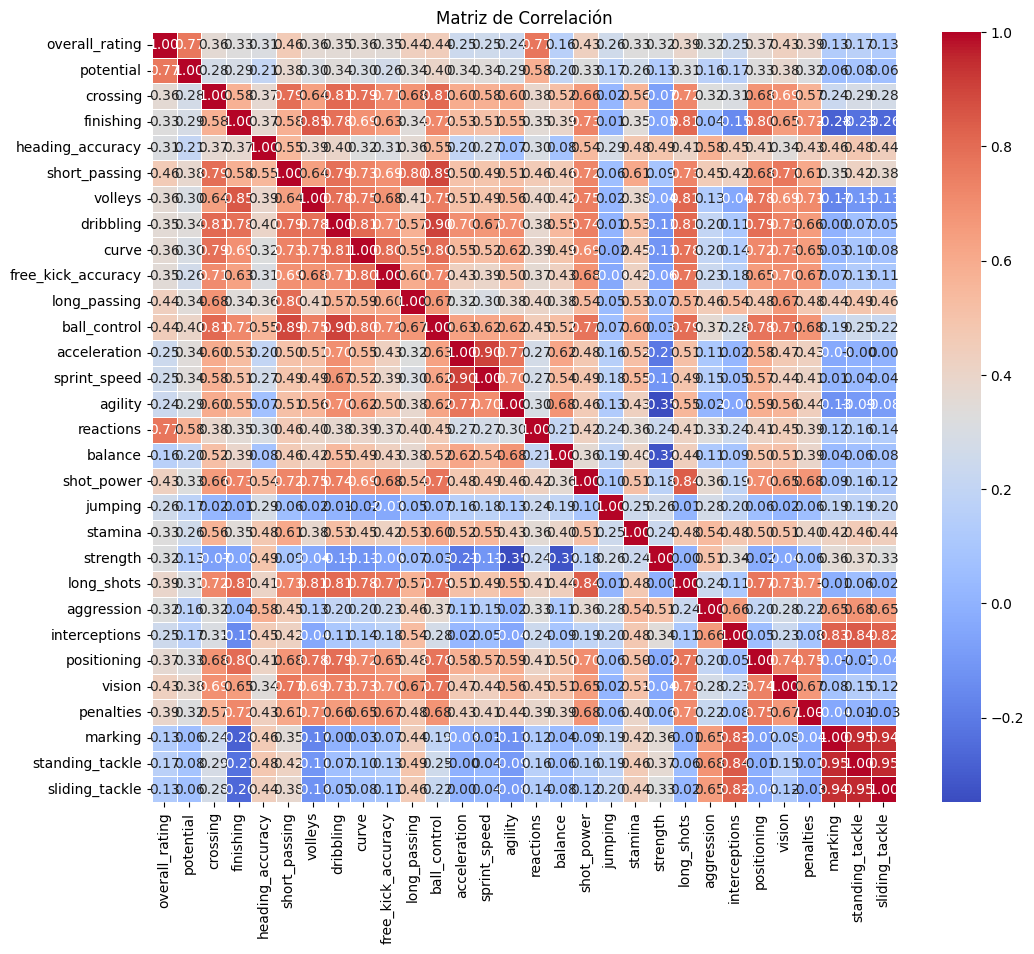

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Player_Attributes.csv')
# Calcular la correlación entre las variables

data = data.iloc[:, 3:37]
correlation_matrix = data.corr()
# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


# **Para predecir la ofensiva de un jugador**

---




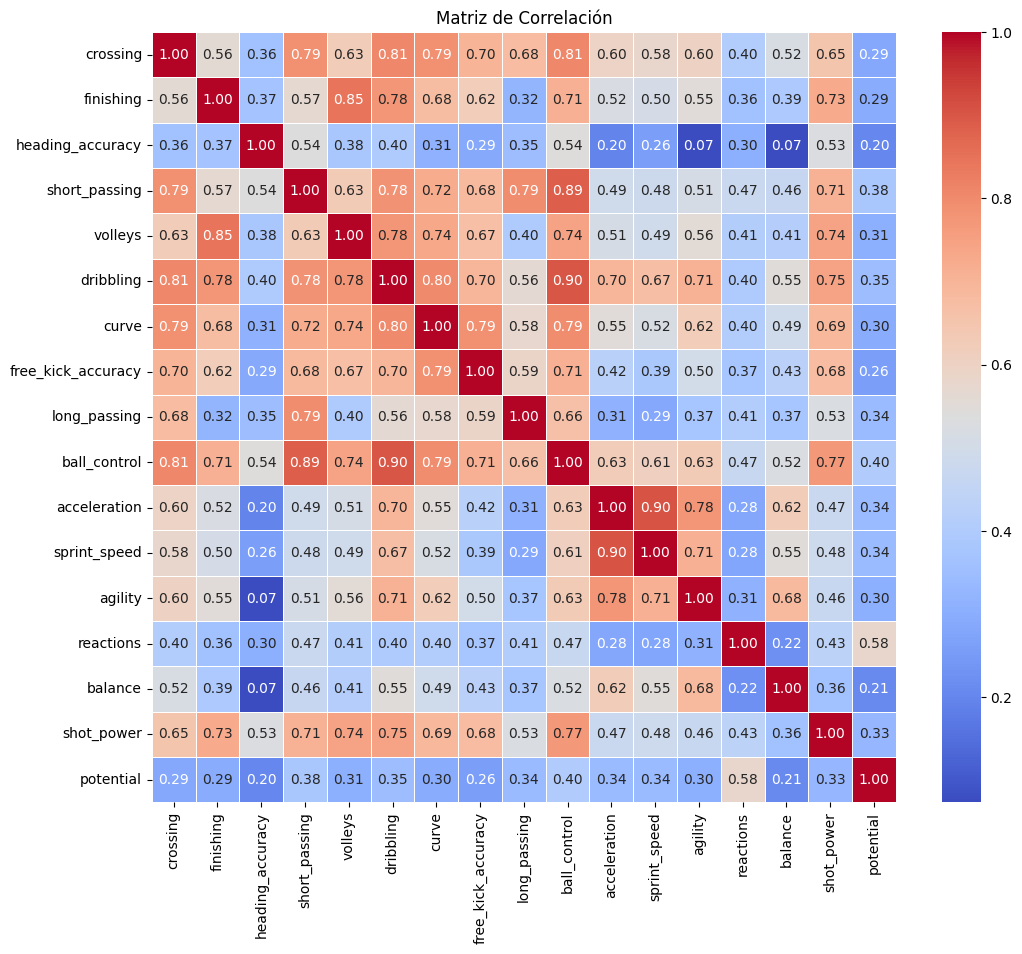

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Seleccionar las variables independientes (características) y la variable objetivo
variables_independientes_ofensivas = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power']
variable_objetivo_ofensivo = 'potential'

# Crear un DataFrame con las variables seleccionadas
data_selected_ofensivas = data[variables_independientes_ofensivas + [variable_objetivo_ofensivo]]
correlation_matrix = data_selected_ofensivas.corr()
# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


In [ ]:
# Contar los valores nulos en cada columna
nulos_por_columna = data_selected_ofensivas.isnull().sum()

print("Valores nulos por columna:")
print(nulos_por_columna)

Valores nulos por columna:
crossing               385
finishing              385
heading_accuracy       385
short_passing          385
volleys               1306
dribbling              385
curve                 1306
free_kick_accuracy     385
long_passing           385
ball_control           385
acceleration           385
sprint_speed           385
agility               1306
reactions              385
balance               1306
shot_power             385
potential              385
dtype: int64


In [ ]:
data_selected_ofensivas_sin_nulos = data_selected_ofensivas.dropna()

# Verificar la forma del DataFrame después de eliminar las filas nulas
print("Forma del DataFrame después de eliminar filas nulas:", data_selected_ofensivas_sin_nulos.shape)

Forma del DataFrame después de eliminar filas nulas: (89885, 17)


Error cuadrático medio para el potencial ofensivo: 25.828345040611637
Tipo del arreglo y_test_ofensivo_arreglo: <class 'numpy.ndarray'>
Forma del arreglo y_test_ofensivo_arreglo: (17977,)


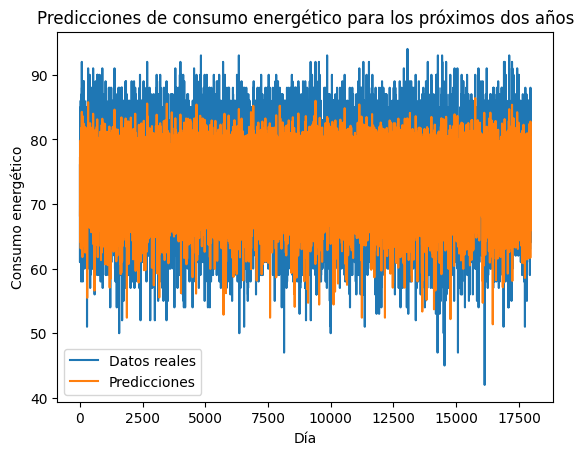

In [ ]:
import numpy as np

# Separar los datos en conjuntos de entrenamiento y prueba
X_train_ofensivo, X_test_ofensivo, y_train_ofensivo, y_test_ofensivo = train_test_split(data_selected_ofensivas_sin_nulos[variables_independientes_ofensivas], data_selected_ofensivas_sin_nulos[variable_objetivo_ofensivo], test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal para el potencial ofensivo
model_ofensivo = LinearRegression()
model_ofensivo.fit(X_train_ofensivo, y_train_ofensivo)

# Realizar predicciones en el conjunto de prueba para el potencial ofensivo
y_pred_ofensivo = model_ofensivo.predict(X_test_ofensivo)

# Evaluar el rendimiento del modelo para el potencial ofensivo (opcional)
mse_ofensivo = mean_squared_error(y_test_ofensivo, y_pred_ofensivo)
print(f"Error cuadrático medio para el potencial ofensivo: {mse_ofensivo}")
# Convertir la columna y_test_ofensivo en un arreglo NumPy
y_test_ofensivo_arreglo = np.array(y_test_ofensivo)

# Verificar el tipo y la forma del arreglo resultante
print("Tipo del arreglo y_test_ofensivo_arreglo:", type(y_test_ofensivo_arreglo))
print("Forma del arreglo y_test_ofensivo_arreglo:", y_test_ofensivo_arreglo.shape)
plt.plot(y_test_ofensivo_arreglo, label='Datos reales')
plt.plot(y_pred_ofensivo, label='Predicciones')
plt.xlabel('Día')
plt.ylabel('Consumo energético')
plt.title('Predicciones de consumo energético para los próximos dos años')
plt.legend()
plt.show()

Precisión del modelo ATAQUE de Bosques Aleatorios: 0.66


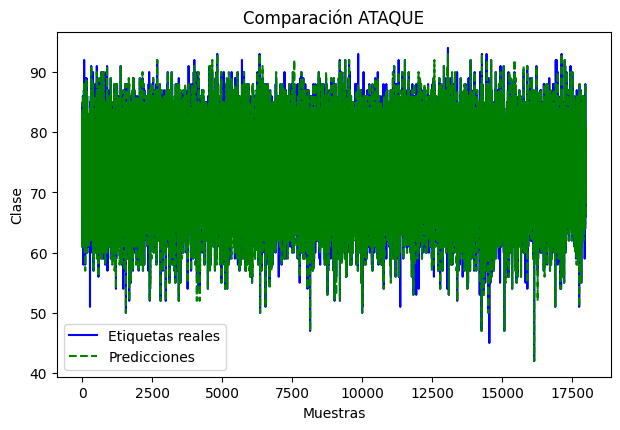

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model_ofensivo =  RandomForestClassifier(n_estimators=200, max_features=15, random_state=10)
# Separar los datos en conjuntos de entrenamiento y prueba
X_train_ofensivo, X_test_ofensivo, y_train_ofensivo, y_test_ofensivo = train_test_split(data_selected_ofensivas_sin_nulos[variables_independientes_ofensivas], data_selected_ofensivas_sin_nulos[variable_objetivo_ofensivo], test_size=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_ofensivo.fit(X_train_ofensivo, y_train_ofensivo)
y_pred_ofensivo= model_ofensivo.predict(X_test_ofensivo)

# Ajustar el tamaño de la figura para que sea más grande (por ejemplo, 12x8 pulgadas)
plt.figure(figsize=(12, 8))

# Calcular la precisión de los modelos
accuracy_ofensivo = accuracy_score(y_test_ofensivo, y_pred_ofensivo)
print("Precisión del modelo ATAQUE de Bosques Aleatorios: {:.2f}".format(accuracy_ofensivo))
# Crear el cuarto subplot para ATAQUE
plt.subplot(2, 2, 4)
plt.plot(range(len(y_test_ofensivo)), y_test_ofensivo, label='Etiquetas reales', color='blue')
plt.plot(range(len(y_test_ofensivo)), y_pred_ofensivo, label='Predicciones', color='green', linestyle='dashed')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Clase')
plt.title('Comparación ATAQUE')

# Ajustar automáticamente los márgenes para evitar superposiciones
plt.tight_layout()

# Mostrar todas las figuras
plt.show()

## **PARA PREDECIR LA DEFENCIVA DE UN JUGADOR**

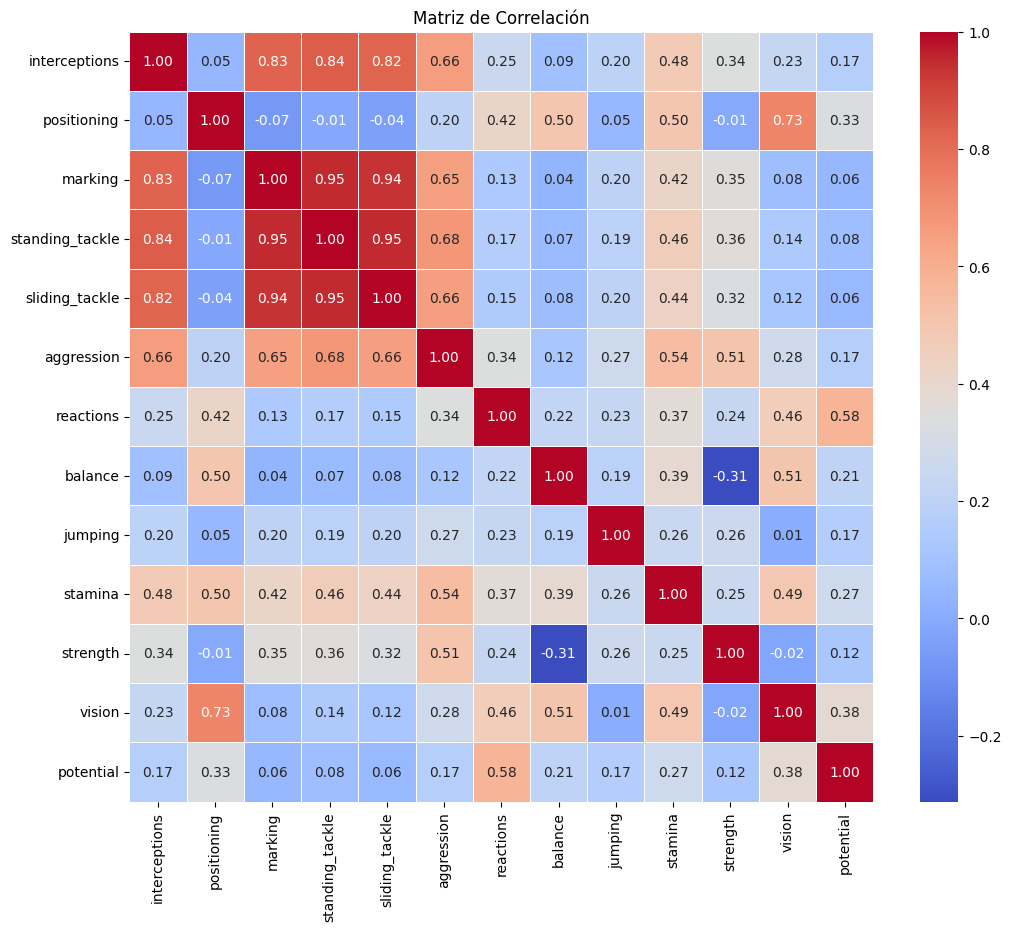

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Seleccionar las variables independientes (características) y la variable objetivo
variables_independientes_defensiva = ['interceptions', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle', 'aggression', 'reactions', 'balance', 'jumping', 'stamina', 'strength', 'vision']
variable_objetivo_defensiva = 'potential'

# Crear un DataFrame con las variables seleccionadas
data_selected_defensiva = data[variables_independientes_defensiva + [variable_objetivo_defensiva]]
correlation_matrix = data_selected_defensiva.corr()
# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()
# Crear un DataFrame con las variables seleccionadas
data_selected = data[variables_independientes + [variable_objetivo]]



In [ ]:
# Contar los valores nulos en cada columna
nulos_por_columna = data_selected_defensiva.isnull().sum()

print("Valores nulos por columna:")
print(nulos_por_columna)

Valores nulos por columna:
interceptions       385
positioning         385
marking             385
standing_tackle     385
sliding_tackle     1307
aggression          385
reactions           385
balance            1306
jumping            1306
stamina             385
strength            385
vision             1306
potential           385
dtype: int64


In [ ]:
data_selected_defensiva_sin_nulos = data_selected_defensiva.dropna()

# Verificar la forma del DataFrame después de eliminar las filas nulas
print("Forma del DataFrame después de eliminar filas nulas:", data_selected_defensiva_sin_nulos.shape)

Forma del DataFrame después de eliminar filas nulas: (89884, 13)


Error cuadrático medio: 27.638394701610835
Tipo del arreglo y_test_ofensivo_arreglo: <class 'numpy.ndarray'>
Forma del arreglo y_test_ofensivo_arreglo: (17977,)


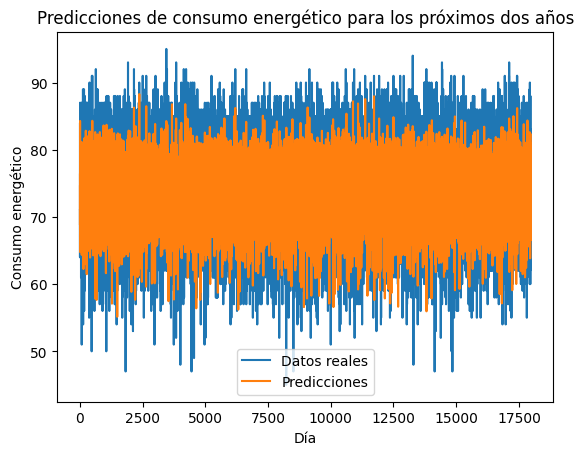

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_selected_defensiva_sin_nulos[variables_independientes_defensiva], data_selected_defensiva_sin_nulos[variable_objetivo_defensiva], test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo (opcional)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")
# Convertir la columna y_test_ofensivo en un arreglo NumPy
y_test_defensivo_arreglo = np.array(y_test)

# Verificar el tipo y la forma del arreglo resultante
print("Tipo del arreglo y_test_ofensivo_arreglo:", type(y_test_defensivo_arreglo))
print("Forma del arreglo y_test_ofensivo_arreglo:", y_test_defensivo_arreglo.shape)
plt.plot(y_test_defensivo_arreglo, label='Datos reales')
plt.plot(y_pred, label='Predicciones')
plt.xlabel('Día')
plt.ylabel('Consumo energético')
plt.title('Predicciones de consumo energético para los próximos dos años')
plt.legend()
plt.show()

       interceptions  positioning  marking  standing_tackle  sliding_tackle  \
0               70.0         45.0     65.0             69.0            69.0   
1               70.0         45.0     65.0             69.0            69.0   
2               41.0         45.0     65.0             66.0            69.0   
3               40.0         44.0     62.0             63.0            66.0   
4               40.0         44.0     62.0             63.0            66.0   
...              ...          ...      ...              ...             ...   
91185           67.0         53.0     65.0             64.0            66.0   
91186           67.0         53.0     65.0             64.0            66.0   
91187           67.0         53.0     65.0             64.0            66.0   
91188           67.0         53.0     65.0             64.0            66.0   
91189           67.0         53.0     65.0             64.0            66.0   

       aggression  reactions  balance  jumping  sta

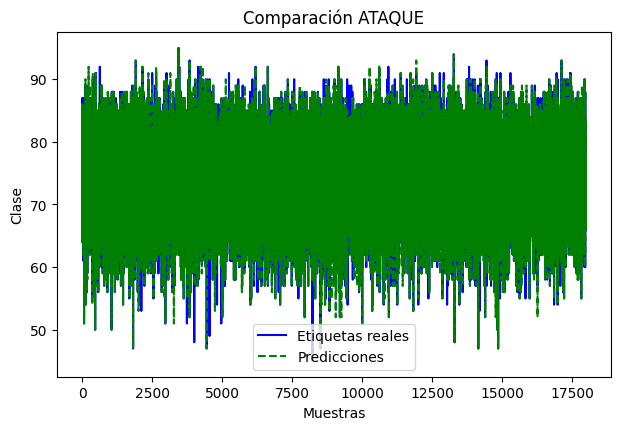

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model_defensivo =  RandomForestClassifier(n_estimators=200, max_features=15, random_state=5)
# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_selected_defensiva_sin_nulos[variables_independientes_defensiva], data_selected_defensiva_sin_nulos[variable_objetivo_defensiva], test_size=0.2, random_state=42)

print(data_selected_defensiva_sin_nulos[variables_independientes_defensiva])
print(data_selected_defensiva_sin_nulos[variable_objetivo_defensiva])
# Entrenar el modelo con los datos de entrenamiento
model_defensivo.fit(X_train, y_train)
y_pred_defensivo= model_defensivo.predict(X_test)

# Ajustar el tamaño de la figura para que sea más grande (por ejemplo, 12x8 pulgadas)
plt.figure(figsize=(12, 8))

# Calcular la precisión de los modelos
accuracy_defendsivo = accuracy_score(y_test, y_pred_defensivo)
print("Precisión del modelo ATAQUE de Bosques Aleatorios: {:.2f}".format(accuracy_defendsivo))
# Crear el cuarto subplot para ATAQUE
plt.subplot(2, 2, 4)
plt.plot(range(len(y_test)), y_test, label='Etiquetas reales', color='blue')
plt.plot(range(len(y_test)), y_pred_defensivo, label='Predicciones', color='green', linestyle='dashed')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Clase')
plt.title('Comparación ATAQUE')

# Ajustar automáticamente los márgenes para evitar superposiciones
plt.tight_layout()

# Mostrar todas las figuras
plt.show()

NUEVOS MODELOS

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv('/content/Player_Attributes.csv')
# Contar los valores nulos en cada columna
data = data.iloc[:, 3:37]
nulos_por_columna = data.isnull().sum()

print("Valores nulos por columna:")
print(nulos_por_columna)

Valores nulos por columna:
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
dtype: int64


In [11]:

data_sin_nulos = data.dropna()

# Verificar la forma del DataFrame después de eliminar las filas nulas
print("Forma del DataFrame después de eliminar filas nulas:", data_sin_nulos.shape)

Forma del DataFrame después de eliminar filas nulas: (180354, 34)


'overall_rating': La calificación general del jugador según los atributos y habilidades en el juego.

'potential': La calificación potencial o el nivel máximo que el jugador puede alcanzar en el juego.


'attacking_work_rate': La tasa de trabajo del jugador en el ataque.

'defensive_work_rate': La tasa de trabajo del jugador en la defensa.

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Variables independientes para cada modelo
variables_overall = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power']
variables_potential = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power']
variables_attacking_work_rate = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control']
variables_defensive_work_rate = ['interceptions', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train__overall, X_test__overall, y_train_overall, y_test_overall = train_test_split(data_sin_nulos[variables_overall], data_sin_nulos['overall_rating'], test_size=0.2, random_state=42)
X_train_potential, X_test_potential, y_train_potential, y_test_potential = train_test_split(data_sin_nulos[variables_potential], data_sin_nulos['potential'], test_size=0.2, random_state=42)
X_train_attacking, X_test_attacking, y_train_attacking, y_test_attacking = train_test_split(data_sin_nulos[variables_attacking_work_rate], data_sin_nulos['attacking_work_rate'], test_size=0.2, random_state=42)
X_train_defensive, X_test_defensive, y_train_defensive, y_test_defensive = train_test_split(data_sin_nulos[variables_defensive_work_rate], data_sin_nulos['defensive_work_rate'], test_size=0.2, random_state=42)

# Crear modelos de árboles de decisión
model_overall = DecisionTreeRegressor(random_state=42)
model_potential = DecisionTreeRegressor(random_state=42)
model_attacking = RandomForestClassifier(random_state=42)
model_defensive = RandomForestClassifier(random_state=42)


# Entrenar los modelos
model_overall.fit(X_train__overall, y_train_overall)
model_potential.fit(X_train_potential, y_train_potential)
# Entrenar los modelos
model_attacking.fit(X_train_attacking, y_train_attacking)
model_defensive.fit(X_train_defensive, y_train_defensive)

# Realizar predicciones en el conjunto de prueba
predictions_overall = model_overall.predict(X_test__overall)
predictions_potential = model_potential.predict(X_test_potential)
predictions_attacking = model_attacking.predict(X_test_attacking)
predictions_defensive = model_defensive.predict(X_test_defensive)

# Evaluar el rendimiento de los modelos
mse_overall = mean_squared_error(y_test_overall, predictions_overall)
mse_potential = mean_squared_error(y_test_potential, predictions_potential)
accuracy_attacking = accuracy_score(y_test_attacking, predictions_attacking)
accuracy_defensive = accuracy_score(y_test_defensive, predictions_defensive)

MSE Overall Rating: 3.6451013232771765
MSE Potential: 8.743144166351055
Accuracy Attacking Work Rate: 0.9366249896038369
Accuracy Defensive Work Rate: 0.9154168168334673


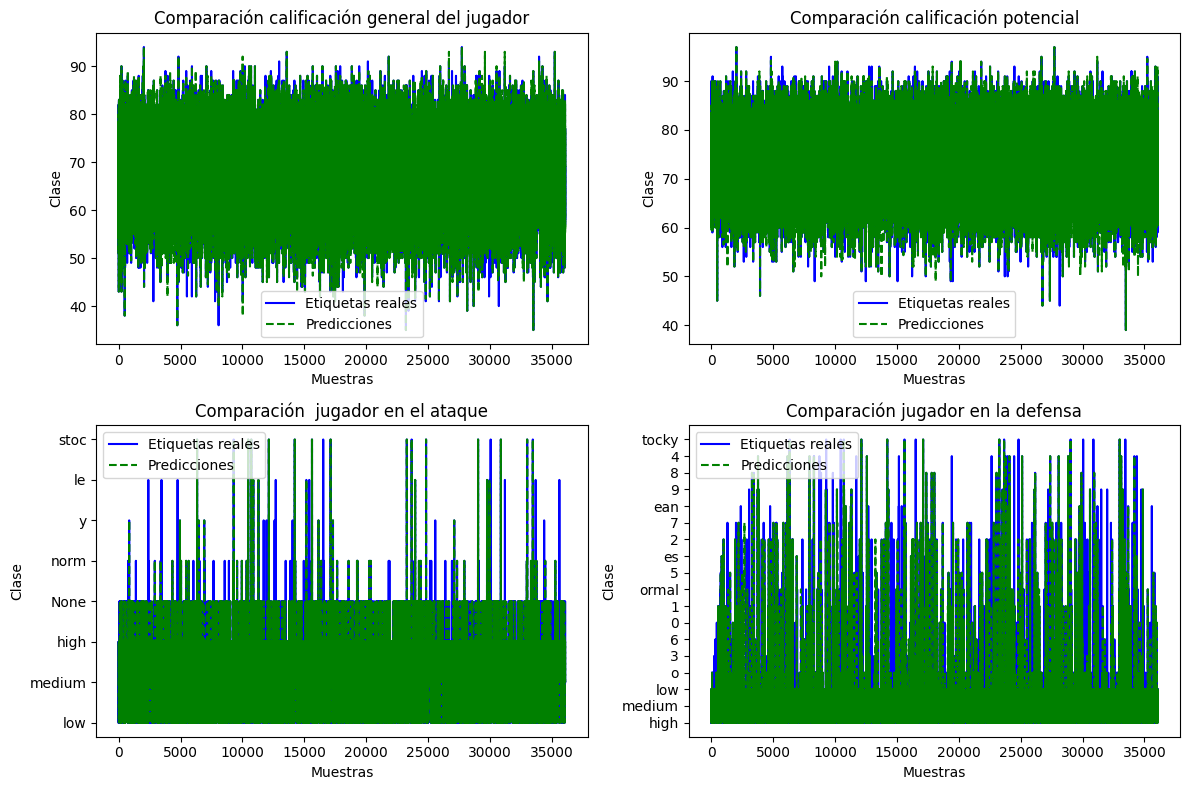

In [13]:
print(f'MSE Overall Rating: {mse_overall}')
print(f'MSE Potential: {mse_potential}')
print(f'Accuracy Attacking Work Rate: {accuracy_attacking}')
print(f'Accuracy Defensive Work Rate: {accuracy_defensive}')

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(range(len(y_test_overall)), y_test_overall, label='Etiquetas reales', color='blue')
plt.plot(range(len(y_test_overall)), predictions_overall, label='Predicciones', color='green', linestyle='dashed')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Clase')
plt.title('Comparación calificación general del jugador')

plt.subplot(2, 2, 2)
plt.plot(range(len(y_test_potential)), y_test_potential, label='Etiquetas reales', color='blue')
plt.plot(range(len(y_test_potential)), predictions_potential, label='Predicciones', color='green', linestyle='dashed')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Clase')
plt.title('Comparación calificación potencial')

plt.subplot(2, 2, 3)
plt.plot(range(len(y_test_attacking)), y_test_attacking, label='Etiquetas reales', color='blue')
plt.plot(range(len(y_test_attacking)), predictions_attacking, label='Predicciones', color='green', linestyle='dashed')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Clase')
plt.title('Comparación  jugador en el ataque')

plt.subplot(2, 2, 4)
plt.plot(range(len(y_test_defensive)), y_test_defensive, label='Etiquetas reales', color='blue')
plt.plot(range(len(y_test_defensive)), predictions_defensive, label='Predicciones', color='green', linestyle='dashed')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Clase')
plt.title('Comparación jugador en la defensa')

# Ajustar automáticamente los márgenes para evitar superposiciones
plt.tight_layout()

# Mostrar todas las figuras
plt.show()

In [14]:
pip install joblib

In [20]:
import joblib

# Guardar modelos en archivos
joblib.dump(model_overall, '/content/drive/MyDrive/model_overall.joblib')

['/content/drive/MyDrive/model_overall.joblib']

In [21]:
joblib.dump(model_potential, '/content/drive/MyDrive/model_potential.joblib')

['/content/drive/MyDrive/model_potential.joblib']

In [22]:
joblib.dump(model_attacking, '/content/drive/MyDrive/model_attacking.joblib')

['/content/drive/MyDrive/model_attacking.joblib']

In [24]:
joblib.dump(model_defensive, '/content/drive/MyDrive/model_defensive.joblib')

['/content/drive/MyDrive/model_defensive.joblib']

In [ ]:
# Datos del nuevo jugador (reemplaza estos valores con los datos reales)
new_player_data = {
    'crossing': 0,
    'finishing': 75,
    'heading_accuracy': 00,
    'short_passing': 85,
    'volleys': 5,
    'dribbling': 40,
    'curve': 72,
    'free_kick_accuracy': 68,
    'long_passing': 10,
    'ball_control': 30,
    'acceleration':40,
    'sprint_speed':50,
    'agility': 50,
    'reactions': 50,
    'balance': 30,
    'shot_power':10,
    'interceptions':80,
    'positioning':70,
    'marking':10,
    'standing_tackle':10,
    'sliding_tackle':30

}
variables_opA = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys','dribbling','curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power']
variables_attacking = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control']
variables_defensive = ['interceptions', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle']

# Crear un DataFrame con los datos del nuevo jugador
new_player_df = pd.DataFrame([new_player_data])
new_player_df=new_player_df.astype(float)
player_overrall = new_player_df[variables_opA]
player_attacking= new_player_df[variables_attacking]
player_defensive  = new_player_df[variables_defensive]
print(new_player_df.dtypes)

# Realizar predicciones con los modelos
predicted_overall = model_overall.predict(player_overrall)[0]
predicted_potential = model_potential.predict(player_overrall)[0]
predicted_attacking = model_attacking.predict(player_attacking)[0]
predicted_defensive = model_defensive.predict(player_defensive)[0]

# Mostrar las predicciones
print(f'Predicted Overall Rating: {predicted_overall}')
print(f'Predicted Potential: {predicted_potential}')
print(f'Predicted Attacking Work Rate: {predicted_attacking}')
print(f'Predicted Defensive Work Rate: {predicted_defensive}')

crossing              float64
finishing             float64
heading_accuracy      float64
short_passing         float64
volleys               float64
dribbling             float64
curve                 float64
free_kick_accuracy    float64
long_passing          float64
ball_control          float64
acceleration          float64
sprint_speed          float64
agility               float64
reactions             float64
balance               float64
shot_power            float64
interceptions         float64
positioning           float64
marking               float64
standing_tackle       float64
sliding_tackle        float64
dtype: object
Predicted Overall Rating: 70.0
Predicted Potential: 63.0
Predicted Attacking Work Rate: medium
Predicted Defensive Work Rate: medium


In [25]:
import sklearn
print(sklearn.__version__)

1.2.2
